# Prototyping/developing a class to extract ROIs (from DICOM) and use them

In [1]:
%pylab --no-import-all inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import dicom
import os, sys
import SimpleITK as sitk

In [3]:
dicomdir=os.environ.get('DICOM_DIRECTORY',os.curdir)
ss=dicom.read_file(os.path.join(dicomdir,'DICOM_4D_STUDIE/53_SHORT/STRUCTURESET.dcm'))

In [4]:
roi0=ss.ROIContourSequence[0]
print(roi0.ReferencedROINumber)
print(roi0.RefdROINumber)
print("{} {}".format(len(ss.ROIContourSequence),len(ss.StructureSetROISequence)))
ssroi0=ss.StructureSetROISequence[0]
print ssroi0.ROINumber
print ssroi0.ROIGenerationAlgorithm
#print(len(ssroi0.ROIContourSequence))
for roi,ssroi in zip(ss.ROIContourSequence,ss.StructureSetROISequence):
    print("{} {} {}".format(roi.RefdROINumber,ssroi.ROINumber,ssroi.ROIName))

16
16
37 37
16
SEMIAUTOMATIC
16 16 aortaklaff
1 1 CTV
20 20 CTV 0
26 26 CTV+ITV
21 21 CTV20
18 18 CTV50
19 19 CTV80
17 17 CTVMIP
4 4 Esophagus
33 33 Esophagus_4D
10 10 External
28 28 External_4D
9 9 Heart
31 31 Heart_4D
27 27 Help_ring
35 35 högdens
34 34 ITV_-24mm_cran
24 24 ITV0+20+50+80+MI
22 22 ITV0+50
23 23 ITV0+50+MIP
14 14 kranskärlsavgång
11 11 Lung_L
29 29 Lung_L_4D
12 12 Lung_R
30 30 Lung_R_4D
13 13 Lung_total
2 2 PTV
3 3 PTV_external
25 25 PTV_ITV+7
15 15 pulmonalisklaff
8 8 SpinalCord
32 32 SpinalCord_4D
6 6 Submandibular_L
7 7 Submandibular_R
5 5 Thyroid
36 36 help_ptv_long
37 37 help_ptv_short


In [5]:
print sorted([int(roi.RefdROINumber) for roi in ss.ROIContourSequence])

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37]


In [6]:
print "\n".join(["{}".format(s) for s in sorted([(int(roi.RefdROINumber),len(roi.ContourSequence),sum([len(c.ContourData) for c in roi.ContourSequence]),"{}={}".format(roi.ContourSequence[0].NumberOfContourPoints*3,len(roi.ContourSequence[0].ContourData)),roi.ROIDisplayColor) for roi in ss.ROIContourSequence])])

(1, 58, 14418, '150=150', ['255', '0', '0'])
(2, 64, 24918, '210=210', ['255', '0', '255'])
(3, 64, 24522, '210=210', ['255', '0', '255'])
(4, 68, 4734, '90=90', ['218', '165', '32'])
(5, 10, 2214, '156=156', ['0', '108', '0'])
(6, 8, 852, '78=78', ['0', '108', '0'])
(7, 8, 894, '78=78', ['0', '108', '0'])
(8, 70, 4878, '78=78', ['128', '64', '64'])
(9, 27, 12450, '378=378', ['192', '0', '192'])
(10, 144, 209214, '1872=1872', ['255', '192', '128'])
(11, 72, 40968, '312=312', ['64', '224', '208'])
(12, 70, 45084, '138=138', ['0', '128', '0'])
(13, 78, 44568, '312=312', ['123', '123', '192'])
(14, 9, 1860, '204=204', ['0', '85', '0'])
(15, 3, 402, '126=126', ['0', '200', '255'])
(16, 3, 408, '144=144', ['0', '200', '255'])
(17, 38, 10266, '150=150', ['0', '200', '255'])
(18, 38, 10698, '168=168', ['255', '0', '0'])
(19, 38, 10422, '186=186', ['0', '200', '255'])
(20, 40, 10740, '132=132', ['0', '200', '255'])
(21, 39, 10560, '150=150', ['0', '200', '255'])
(22, 40, 11160, '132=132', ['25

In [7]:
roi00=roi0.ContourSequence[0]
print type(roi00)
print roi00.ContourGeometricType
print roi00.NumberOfContourPoints
print type(roi00.ContourData)
print len(roi00.ContourData)
print roi00.ContourData

<class 'dicom.dataset.Dataset'>
CLOSED_PLANAR
48
<class 'dicom.multival.MultiValue'>
144
['-5.69', '83.71', '-606', '-3.62', '83.17', '-606', '-1.55', '83.07', '-606', '5.2e-1', '83.39', '-606', '2.59', '83.84', '-606', '4.66', '83.92', '-606', '6.73', '84.38', '-606', '6.74', '84.39', '-606', '8.8', '85.39', '-606', '10.21', '86.46', '-606', '10.87', '87.13', '-606', '11.93', '88.53', '-606', '12.92', '90.6', '-606', '12.94', '90.69', '-606', '13.39', '92.67', '-606', '13.41', '94.74', '-606', '13.03', '96.81', '-606', '12.94', '96.94', '-606', '12.09', '98.88', '-606', '10.87', '100.55', '-606', '10.48', '100.96', '-606', '8.8', '102.27', '-606', '7.57', '103.03', '-606', '6.73', '103.86', '-606', '5.33', '105.1', '-606', '4.66', '105.56', '-606', '2.59', '106.51', '-606', '5.2e-1', '106.95', '-606', '-1.55', '106.99', '-606', '-3.62', '106.89', '-606', '-5.69', '106.34', '-606', '-7.76', '105.27', '-606', '-7.97', '105.1', '-606', '-9.83', '103.33', '-606', '-10.1', '103.03', '-606'

In [8]:
roi000=roi00.ContourImageSequence[0]
#roi000.RefdSOPClassUID
for c in roi0.ContourSequence[:]:
    cimg=c.ContourImageSequence[0]
    print("{}\n{}\n{}\n{}".format(cimg.RefdSOPClassUID,
                                  cimg.RefdSOPInstanceUID,
                                  cimg.ReferencedSOPClassUID,
                                  cimg.ReferencedSOPInstanceUID))

CT Image Storage
1.3.6.1.4.1.2452.6.220133777.1158515368.4092929982.1599553442
CT Image Storage
1.3.6.1.4.1.2452.6.220133777.1158515368.4092929982.1599553442
CT Image Storage
1.3.6.1.4.1.2452.6.883614441.1142474686.3312618121.2103924579
CT Image Storage
1.3.6.1.4.1.2452.6.883614441.1142474686.3312618121.2103924579
CT Image Storage
1.3.6.1.4.1.2452.6.2242246146.1194155167.2538097289.1729951194
CT Image Storage
1.3.6.1.4.1.2452.6.2242246146.1194155167.2538097289.1729951194


In [9]:
print roi000.RefdSOPInstanceUID
print roi000
a=np.array(range(12)).reshape(4,3)
print a
str(889)
range(8,0,-1)

1.3.6.1.4.1.2452.6.220133777.1158515368.4092929982.1599553442
(0008, 1150) Referenced SOP Class UID            UI: CT Image Storage
(0008, 1155) Referenced SOP Instance UID         UI: 1.3.6.1.4.1.2452.6.220133777.1158515368.4092929982.1599553442
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


[8, 7, 6, 5, 4, 3, 2, 1]

In [10]:
def roi_info(ds,roi_id):
    ok=False
    assert(len(ds.ROIContourSequence)==len(ds.StructureSetROISequence))
    for roi,ssroi in zip(ds.ROIContourSequence,ds.StructureSetROISequence):
        if (str(roi_id)==str(roi.RefdROINumber)) or (str(roi_id)==str(ssroi.ROIName)):
            roinr = int(roi.RefdROINumber)
            roiname = ssroi.ROIName
            ok = True
            break
        #else: # debug
        #    print("{} != {}".format(roi_id,roi.RefdROINumber))
    if not ok:
        print("NOT OK")
        return
    ncontour = len(roi.ContourSequence)
    npoints_total = sum([len(c.ContourData) for c in roi.ContourSequence])
    zvalues = [float(c.ContourData[-1]) for c in roi.ContourSequence]
    print("roi {}={} has {} points on {} contours with z range [{},{}]".format(
            roinr,roiname,npoints_total,ncontour,min(zvalues),max(zvalues)))
    for i,contour in enumerate(roi.ContourSequence):
        print("image reference {}".format(contour.ContourImageSequence[0].RefdSOPInstanceUID))
        npoints = int(contour.NumberOfContourPoints)
        assert(len(contour.ContourData)==3*npoints)
        points = numpy.array([float(coord) for coord in contour.ContourData]).reshape(npoints,3)
        zvalues = set(points[:,2])
        assert(len(zvalues)==1)
        phi=0.
        for i in range(npoints):
            j=(i+1)%npoints
            k=(i+2)%npoints
            ji=points[j,:]-points[i,:]
            kj=points[k,:]-points[j,:]
            assert(ji[2]==0)
            assert(kj[2]==0)
            krossproduct=ji[0]*kj[1]-ji[1]*kj[0]
            norms=np.sqrt(np.sum(ji**2)*np.sum(kj**2))
            sinphi=krossproduct/norms
            if sinphi<=-1:
                phi+=180.
                print("OOPS full turnaround? sinphi={} krossproduct={} norms={}".format(sinphi,krossproduct,norms))
            elif sinphi<1:
                phi+=np.arcsin(sinphi)*180./np.pi
        print("contour {} point 1=({}) point {}=({}) phi = {} degrees".format(i,points[0,:],npoints,points[-1,:],phi))
    

In [11]:
roi_info(ss,'CTV20')

roi 21=CTV20 has 10560 points on 39 contours with z range [-588.0,-474.0]
image reference 1.3.6.1.4.1.2452.6.2753973449.1171959527.3608862634.1152914939
contour 49 point 1=([   2.59   55.22 -588.  ]) point 50=([   1.87   55.41 -588.  ]) phi = 360.0 degrees
image reference 1.3.6.1.4.1.2452.6.952867075.1173068336.535155125.1632123742
contour 47 point 1=([  -1.55   57.41 -585.  ]) point 48=([  -1.8    57.48 -585.  ]) phi = 360.0 degrees
image reference 1.3.6.1.4.1.2452.6.2475484519.1281130928.1815957651.2611182998
contour 55 point 1=([  -7.76   59.48 -582.  ]) point 56=([  -7.84   59.55 -582.  ]) phi = 360.0 degrees
image reference 1.3.6.1.4.1.2452.6.1724496549.1287714929.1641416331.615700102
contour 61 point 1=([  -5.69   59.09 -579.  ]) point 62=([  -6.46   59.55 -579.  ]) phi = 360.0 degrees
image reference 1.3.6.1.4.1.2452.6.475501196.1112341256.2178301092.1136980145
contour 67 point 1=([  -7.76   61.3  -576.  ]) point 68=([  -8.13   61.62 -576.  ]) phi = 360.0 degrees
image reference

In [12]:
def list_roinames(ds):
    assert(len(ds.ROIContourSequence)==len(ds.StructureSetROISequence))
    return [str(ssroi.ROIName) for ssroi in ds.StructureSetROISequence]

class region_of_interest(object):
    def __init__(self,ds,roi_id,verbose=False):
        ok=False
        assert(len(ds.ROIContourSequence)==len(ds.StructureSetROISequence))
        for roi,ssroi in zip(ds.ROIContourSequence,ds.StructureSetROISequence):
            if (str(roi_id)==str(roi.RefdROINumber)) or (str(roi_id)==str(ssroi.ROIName)):
                self.roinr = int(roi.RefdROINumber)
                self.roiname = str(ssroi.ROIName)
                ok = True
                break
            #else: # debug
            #    print("{} != {}".format(roi_id,roi.RefdROINumber))
        if not ok:
            raise ValueError("ROI with id {} not found".format(roi_id))
        self.ncontours = len(roi.ContourSequence)
        self.npoints_total = sum([len(c.ContourData) for c in roi.ContourSequence])
        zvalues = [float(c.ContourData[-1]) for c in roi.ContourSequence]
        self.zmin=min(zvalues)
        self.zmax=max(zvalues)
        if verbose:
            print("roi {}={} has {} points on {} contours with z range [{},{}]".format(
                    self.roinr,self.roiname,self.npoints_total,self.ncontours,self.zmin,self.zmax))
        self.contours=[]
        self.dz = 0.
        self.contour_refs=[]
        for i,contour in enumerate(roi.ContourSequence):
            npoints = int(contour.NumberOfContourPoints)
            assert(len(contour.ContourData)==3*npoints)
            points = numpy.array([float(coord) for coord in contour.ContourData]).reshape(npoints,3)
            zvalues = set(points[:,2])
            assert(len(zvalues)==1)
            self.contours.append(points)
            self.contour_refs.append(contour.ContourImageSequence[0].RefdSOPInstanceUID)
            if i==1:
                self.dz = points[0,2] - self.contours[0][0,2]
                if abs(self.dz)<1e-6:
                    self.dz = 0.
            elif self.dz>0. or self.dz<0.:
                checkdz = points[0,2] - self.contours[i-1][0,2]
                if abs(checkdz-self.dz)>1e-6:
                    self.dz = 0.
    def get_mask(self,img):
        if self.dz == 0.:
            print("Irregular z-values, masking not yet supported")
            return None
        dims=img.GetSize()
        if len(dims)!=3:
            print("ERROR only 3d images supported")
            return None
        roimask = sitk.Image(dims,sitk.sitkUInt8)
        roimask.CopyInformation(img)
        orig = roimask.GetOrigin()
        space = roimask.GetSpacing()
        zmin = orig[2] - 0.5000001*space[2]
        zmax = orig[2] + (dims[2]-0.50000001)*space[2]
        xpoints=np.linspace(orig[0],orig[0]+space[0]*dims[0],dims[0],False)
        ypoints=np.linspace(orig[1],orig[1]+space[1]*dims[1],dims[1],False)
        xymesh = np.meshgrid(xpoints,ypoints)
        if zmin>self.zmax or zmax<self.zmin:
            print("WARNING: no overlap in z ranges")
            return roimask
        contour0pts = self.contours[0]
        #print contour0pts.shape
        z0=contour0pts[0,2]
        #print("z0={}".format(z0))
        for iz in range(dims[2]):
            z=orig[2]+space[2]*iz
            icz = int(np.round((z-z0)/self.dz))
            if icz>=0 and icz<self.ncontours:
                path = matplotlib.path.Path(self.contours[icz][:,0:2])
                flatmask = path.contains_points(np.array([(x,y) for x,y in zip(xymesh[0].flat,xymesh[1].flat)]))
                for iflat,b in enumerate(flatmask):
                    if not b:
                        continue
                    ix = iflat % dims[0]
                    iy = iflat / dims[0]
                    roimask[ix,iy,iz]=1
        return roimask
    def get_dvh(self,img,nbins=100,dmin=None,dmax=None):
        dims=img.GetSize()
        if len(dims)!=3:
            print("ERROR only 3d images supported")
            return None
        aimg = sitk.GetArrayFromImage(img)
        if dmin is None:
            dmin=np.min(aimg)
        if dmax is None:
            dmax=np.max(aimg)
        amask=(sitk.GetArrayFromImage(self.get_mask(img))>0)
        dhist,dedges = np.histogram(aimg[amask],bins=nbins,range=(dmin,dmax))
        adhist=np.array(dhist,dtype=float)
        dhistsum=np.sum(adhist)
        amasksum=np.sum(amask)
        adchist=np.cumsum(adhist)
        assert(amasksum==dhistsum)
        assert(amasksum==adchist[-1])
        if dhistsum>0:
            dvh=-1.0*adchist/dhistsum+1.0
        return dvh, dedges, dhistsum
                

    # CODE TO DETERMINE LEFT/RIGHT HANDEDNESS OF CONTOUR
    #        phi=0.
    #        for i in range(npoints):
    #            j=(i+1)%npoints
    #            k=(i+2)%npoints
    #            ji=points[j,:]-points[i,:]
    #            kj=points[k,:]-points[j,:]
    #            assert(ji[2]==0)
    #            assert(kj[2]==0)
    #            krossproduct=ji[0]*kj[1]-ji[1]*kj[0]
    #            norms=np.sqrt(np.sum(ji**2)*np.sum(kj**2))
    #            sinphi=krossproduct/norms
    #            if sinphi<-1:
    #                phi+=180.
    #                print("OOPS full turnaround? sinphi={} krossproduct={} norms={}".format(sinphi,krossproduct,norms))
    #            elif sinphi<1:
    #                phi+=np.arcsin(sinphi)*180./np.pi
    #        print("contour {} point 1=({}) point {}=({}) phi = {} degrees".format(i,points[0,:],npoints,points[-1,:],phi))
    

In [13]:
print list_roinames(ss)
r=region_of_interest(ss,'CTV20',True)

['aortaklaff', 'CTV', 'CTV 0', 'CTV+ITV', 'CTV20', 'CTV50', 'CTV80', 'CTVMIP', 'Esophagus', 'Esophagus_4D', 'External', 'External_4D', 'Heart', 'Heart_4D', 'Help_ring', 'h\xc3\xb6gdens', 'ITV_-24mm_cran', 'ITV0+20+50+80+MI', 'ITV0+50', 'ITV0+50+MIP', 'kransk\xc3\xa4rlsavg\xc3\xa5ng', 'Lung_L', 'Lung_L_4D', 'Lung_R', 'Lung_R_4D', 'Lung_total', 'PTV', 'PTV_external', 'PTV_ITV+7', 'pulmonalisklaff', 'SpinalCord', 'SpinalCord_4D', 'Submandibular_L', 'Submandibular_R', 'Thyroid', 'help_ptv_long', 'help_ptv_short']
roi 21=CTV20 has 10560 points on 39 contours with z range [-588.0,-474.0]


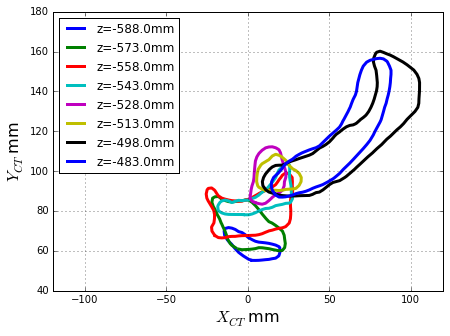

In [14]:
fig=pylab.figure(figsize=[7,5])
for c in r.contours[::5]:
    pylab.plot(c[:,0],c[:,1],lw=3,label='z={}mm'.format(c[0,2]))
xmin,xmax=pylab.xlim()
xmin -= 0.5*(xmax-xmin)
pylab.xlim(xmin,xmax)
pylab.xlabel(r'$X_{CT}$ mm',fontsize=16)
pylab.ylabel(r'$Y_{CT}$ mm',fontsize=16)
pylab.grid()
pylab.legend(loc='upper left')

In [15]:
img2d=sitk.Image(50,50,sitk.sitkUInt8)
img2d.SetOrigin([-28.5,51.5])
img2d.SetSpacing([3.,3.])
print img2d[3,14]
print img2d.TransformPhysicalPointToContinuousIndex([23,88])
print img2d.TransformPhysicalPointToIndex([23,88])
help(img2d.CopyInformation)

0
(17.166666666666664, 12.166666666666666)
(17L, 12L)
Help on method CopyInformation in module SimpleITK.SimpleITK:

CopyInformation(self, *args, **kwargs) method of SimpleITK.SimpleITK.Image instance
    CopyInformation(Image self, Image srcImage)
    
    Copy common meta-data from an image to this one.
    
    
    Copies the Origin, Spacing, and Direction from the source image to
    this image.
    
    It is required for the source Image's dimension and size to match, this image's attributes, otherwise an
    exception will be generated.



(50, 200)

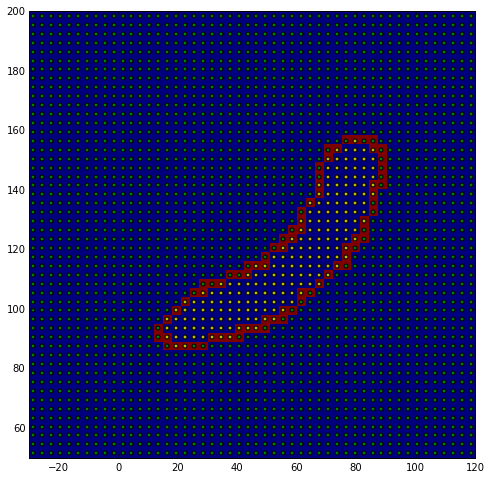

In [26]:
pylab.figure(num="1",figsize=[8,8])

img2d[3,14]=0
c5=r.contours[35]
for px,py in zip(c5[:,0],c5[:,1]):
    i,j=img2d.TransformPhysicalPointToIndex([px,py])
    img2d[i,j]=1
#print img2d[3,14]
pylab.imshow(sitk.GetArrayFromImage(img2d),origin='lower',interpolation='nearest',extent=[-30,120,50,200])
c5path=matplotlib.path.Path(c5[:,:2])
ox,oy=img2d.GetOrigin()
sx,sy=img2d.GetSpacing()
nx,ny=img2d.GetSize()
xpt,ypt=np.meshgrid(np.arange(ox,ox+(nx-0.25)*sx,sx),np.arange(oy,oy+(ny-0.25)*sy,sy))
inmask=c5path.contains_points(np.array([(x,y) for x,y in zip(xpt.flat,ypt.flat)]))
outmask=np.logical_not(inmask)
pylab.scatter(xpt.flat[inmask],ypt.flat[inmask],s=15.,c='y')
pylab.scatter(xpt.flat[outmask],ypt.flat[outmask],s=15.,c='g')
pylab.xlim(-30,120)
pylab.ylim(50,200)

In [17]:
xxx=np.nan
if xxx > 0. or xxx < 0.:
    print "nonzero"
else:
    print "oops"

oops


In [18]:
np.linspace(0,5,5,False)

array([ 0.,  1.,  2.,  3.,  4.])

In [19]:
xarr=np.linspace(0,5,5,False)
yarr=np.linspace(0,4,4,False)
xy=np.meshgrid(xarr,yarr)
print xy[0]
print xy[1]
print xy[0].flatten()
print xy[1].flatten()
print xy[1].flatten().shape
print xy[0]
abc = np.arange(24).reshape(4,6)
abcmask = np.zeros((4,6),dtype=bool)
abcmask[0,2]=True
abcmask[1,2:4]=True
abcmask[3,5]=True
print abc
print abcmask
print abc[abcmask]
print abc[abcmask][:].shape
print np.diff(abc[abcmask])
h,e=np.histogram(abc[abcmask],bins=5,range=(0,24))
print h
print e

[[ 0.  1.  2.  3.  4.]
 [ 0.  1.  2.  3.  4.]
 [ 0.  1.  2.  3.  4.]
 [ 0.  1.  2.  3.  4.]]
[[ 0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  1.]
 [ 2.  2.  2.  2.  2.]
 [ 3.  3.  3.  3.  3.]]
[ 0.  1.  2.  3.  4.  0.  1.  2.  3.  4.  0.  1.  2.  3.  4.  0.  1.  2.
  3.  4.]
[ 0.  0.  0.  0.  0.  1.  1.  1.  1.  1.  2.  2.  2.  2.  2.  3.  3.  3.
  3.  3.]
(20,)
[[ 0.  1.  2.  3.  4.]
 [ 0.  1.  2.  3.  4.]
 [ 0.  1.  2.  3.  4.]
 [ 0.  1.  2.  3.  4.]]
[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]]
[[False False  True False False False]
 [False False  True  True False False]
 [False False False False False False]
 [False False False False False  True]]
[ 2  8  9 23]
(4,)
[ 6  1 14]
[1 2 0 0 1]
[  0.    4.8   9.6  14.4  19.2  24. ]


In [20]:
testimg = sitk.GaussianSource(sitk.sitkFloat64,[150,128,64],origin=(-30.,50.,-588.),spacing=(1,1,3),mean=(25,100,-550),sigma=(50,50,50),scale=1000.)

(50, 3)
z0=-588.0
foo
(50, 3)
z0=-588.0
bar nvoxels=37750.0


<Container object of 100 artists>

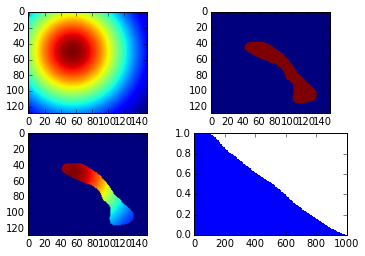

In [21]:
aimg=sitk.GetArrayFromImage(testimg)
fig=pylab.figure(num="3")
fig.add_subplot(221)
pylab.imshow(aimg[32,:,:])
testmask=r.get_mask(testimg)
fig.add_subplot(222)
amask=sitk.GetArrayFromImage(testmask)
pylab.imshow(amask[32,:,:])
image_masked=sitk.GetImageFromArray(amask*aimg)
image_masked.CopyInformation(testimg)
aresult=sitk.GetArrayFromImage(image_masked)
fig.add_subplot(223)
pylab.imshow(aresult[32,:,:])
print("foo")
dvh,edges,nvoxels=r.get_dvh(testimg)
print("bar nvoxels={}".format(nvoxels))
fig.add_subplot(224)
pylab.bar(edges[:-1],dvh,np.diff(edges),lw=0)

In [23]:
np.cumprod([3,4,5])[-1]

60

In [25]:
reduce(lambda x,y: x*y, np.array([3,4,5]))

60